#####  Decision tree là một mô hình supervised learning, có thể được áp dụng vào cả hai bài toán classification và regression
   - Regression Tree có biến mục tiêu là biến liên tục, trong khi Classification Tree có biến mục tiêu la biến phân loại.
   - Trong Regression Tree, khi huấn luyện, giá trị tại nút lá bằng trung bình các giá trị biến mục tiêu của các điểm dữ liệu có trong nút đó. Nên khi đưa tập test vào, nếu các điểm dữ liệu rơi vào nút lá nào, kết quả trả ra sẽ là giá trị trung bình.
   - Với Classification Tree, khi huấn luyện, giá trị tại nút lá(phân lớp) bằng giá trị có tần suất cao nhất(Mode) của các dữ liệu trong nút đó. Nên khi đưa tập test vào, nếu các điểm dữ liệu rơi vào nút lá nào, kết quả trả ra sẽ là Mode.

   Tổng quan thì mô hình bắt đầu bằng việc chọn 1 feature là Root Nood, sau mỗi lần lặp của thuật toán sẽ sử dụng các feature chưa được dùng đến làm các node tiếp theo (Các kỹ thuật lựa chọn feature nào sẽ là node tiếp theo sẽ được trình bày chi tiết ở dưới). Thuật toán tiếp tục lặp lại trên mỗi tập con, chỉ lặp các feature chưa được chọn trước đó.

- Mô hình có thể dừng lại trong một trong những trường hợp sau:
      + Mọi output trong tập hợp con đều thuộc cùng một lớp
      + Không còn Input nào được chọn. Trong trường hợp Output trong tập con không thuộc cùng một lớp thì sẽ được gắn nhãn bằng output phổ biến nhất trong tập hợp con.



#  Lý thuyết Classification Tree

####  Bước 1: Chọn Root node

Bằng trực giác, một Root nood là tốt nhất nếu dữ liệu trong mỗi child node hoàn toàn thuộc vào một class–khi đó node này có thể được coi là một leaf node, tức ta không cần phân chia thêm nữa. Nếu dữ liệu trong các child node vẫn lẫn vào nhau theo tỉ lệ lớn, ta coi rằng phép phân chia đó chưa thực sự tốt. Từ nhận xét này, ta cần có một hàm số đo độ tinh khiết (purity), hoặc độ vẩn đục (impurity) của một phép phân chia. 

##### Các phương pháp lựa chọn node
## 1.1 Gini Index
- Là phương pháp tìm ra attribute có độ vẩn đục (impurity) thấp nhất trong các feature.
- Nó áp dụng cho biến mục tiêu là biến phân loại có dạng “Success” và “Failure”
- Nó chỉ được dùng cho phân nhánh nhị phân.
- Giá trị của Gini càng cao thì tính đồng nhất càng cao

Công thức : 1− ∑p(i)^2 trong đó ∑p(i)^2 là công thức tính GINI. 1- GINI = độ vẩn đục

### ví dụ: 
<img src="gini.png" width="800" />

###### Làm tương tự ở các Feature còn lại. Chọn ra Feature có độ vẩn đục Impurity thấp nhất là Node rồi lặp lại các bước trên

## 1.2 Information gain
##### Entropy là chỉ số để đo độ hỗn loạn của dữ liệu.Entropy càng thấp thì độ hỗn loạn càng thấp, nghĩa là việc phân nhánh càng cho kết quả tốt

- B1: Tính entrophy của cả tập dữ liệu 
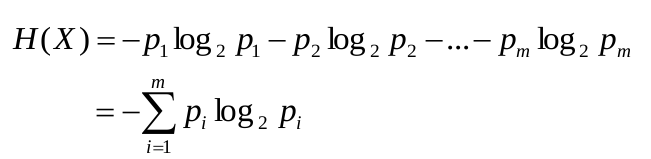

- B2: Tính Entropy cho từng node con sau khi phân nhánh và tính trọng số trung bình của toàn bộ nút con.


- B3: Tính Information gain by Feature bằng công thức IG(Y|X) = H(Y) - H(Y|X)  và chọn Feature có IG cao nhất làm node
###### Ví dụ 

<img src="IG.png" width="800" />




## 1.3 Chi test (ít được dùng)
- Tìm ra Feature có mức độ ảnh hưởng tới đầu ra lớn nhất. Chi-square được tính bằng cách tính tổng bình phương độ lệch chuẩn giữa các quan sát và kì vọng tần suất của biến phụ thuộc
- Nó áp dụng cho biến mục tiêu là biến phân loại có dạng “Success” và “Failure”.
- Nó có thể làm việc trên phân nhánh nhị phân và đa phân nhánh.
- Giá trị của Chi-square càng cao thì ý nghĩa thống kê về sự khác nhau giữa node con và node cha càng cao.
- Công thức tính Chi-square trên mỗi node Chi-square = ((Thực tế – Kì vọng)^2 / Kì vọng)^1/2
- Tree sử dụng thuật toán Chi-square được gọi là CHAID(Chi-square Automatic Interaction Detectior)

##### Các bước để tính chỉ số Chi-Square cho phân nhánh

- Tính Chi-square cho từng node bằng cách tính độ lệch của Success và Failure
- Tính Chi-square của phân nhánh bằng cách tính tổng Chi-square của Success và Failure
##### Ví dụ: 


###### Phân nhánh theo thuộc tính Gender

- Với node Female, Play = 2 và Not Play = 10 – 2 = 8
- Giả sử Ở node cha, xác suất Play = Not Play = 0.5. Do đó kì vọng Play ở node con = 0.5 * 10 = 5 và kì vọng Not Play ở node con = 0.5 * 10 = 5
- Tính toán độ lệch giữa thực tế và kì vọng. 
- Tính toán Chi-square trên từng node cho Play theo công thức Chi-square = ((Thực tế – Kì vọng)^2 / Kì vọng)^1/2
- Thực hiện các bước tương tự với node Male.
- Tính tổng các giá trị Chi-square

<img src="Chisquare.png" width="800" />


## 1.4 Reduce Variance (ít được dùng)
- Lựa chọn feature có phương sai bé nhất

Cả ba thuật toán trên đều áp dụng cho Categorical Decision Tree. Reduction in Varicance là thuật toán sử dụng cho Regression Decision Tree. Thuật toán sử dụng phương sai để chọn việc phân nhánh. Phân nhánh nào có phương sai nhỏ hơn thì sẽ được chọn. Công thức tính như sau
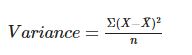
Các bước tính Variance :

- B1: Tính variance trên mỗi node
- B2: Tính Variance cho mỗi phân nhánh bằng trung bình variance của các node con
##### Ví dụ : Để đơn giản cho bài toán Regression , chuẩn hóa biến mục tiêu như sau : giá trị 1 = Play và giá trị 0 = Not play


<img src="varian.png" width="800" />

# Lý thuyết cơ bản Regression Tree

- Về việc lựa chọn Root Node, trong trường hợp chỉ có 1 feature thì ta sẽ tính Sum of Squared Residuals tại mỗi điểm, chọn ra điểm có Residual thấp nhất làm mốc để chia dữ liệu. Trong trường hợp có nhiều feature thì tương tự như trên tuy nhiên ta sẽ tính thêm cho các feature còn lại, so sánh min(SSR) của các feature và chọn feature có giá trị min(SSR) thấp nhất làm root của tree
- Giá trị ở mỗi Leaf được tính toán bằng average các giá trị trong nhóm đó
    



# So sánh Tree model với các model khác
- Khi có MQH tuyến tính giữa biến độc lập và biến phụ thuộc thì nên dùng các model Regression để cho kết quả tốt hơn
- Ngược lại MQH giữa X và Y là phức tạp, không có tuyến tính thì Tree Model sẽ là sự lựa chọn tốt hơn

# Example

In [1]:
import pandas as pd

In [25]:
data = pd.read_csv('salaries.csv')
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [31]:
input = data.drop('salary_more_then_100k', axis=1)
output = data.salary_more_then_100k
input.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


##### Encode label

In [27]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [32]:
Label_Company = LabelEncoder()
Label_Job = LabelEncoder()
Label_Degree = LabelEncoder()

In [33]:
input['new_company'] = Label_Company.fit_transform(input.company)
input['new_job'] = Label_Job.fit_transform(input.job)
input['new_degree'] = Label_Degree.fit_transform(input.degree)
input = input.drop(input.columns[0:3], axis =1)
input.head()

,new_company,new_job,new_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


###  Import Tree Model from sklearn and using

In [49]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(input, output)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

- criterion: Phương pháp chọn root node  ( Gini hoặc entrophy)


- Max_depth: Chiều tối đa của cây. Nếu để mặc định, thì các nút được mở rộng cho đến khi tất cả các lá đều thuần túy hoặc cho đến khi tất cả các lá chứa ít hơn mẫu min_samples_split. Max_dept càng cao thì thông tin nhận được sẽ nhiều hơn tuy nhiên dễ dẫn tới overfit


- min_samples_split: Số lượng mẫu tối thiếu để tách node. Có thể nhập int hoặc float. 
       - Nếu là int thì là số mẫu tối thiểu, 
       - Float thì sẽ là tỷ lệ, tức là số mẫu tối thiểu = float x Số lượng sample
       
- min_samples_leaf: Leaf node là 1 node mà k có node con. Đây là số lượng phần tử tối thiểu yêu cầu để được coi là 1 leaf
       - Nếu là int thì là số mẫu tối thiểu, 
       - Float thì sẽ là tỷ lệ, tức là số mẫu tối thiểu = float x Số lượng sample
       
- max_features: Số lượng các Features được xem xét khi tìm kiếm sự phân chia tốt nhất:
        - Nhập int: Số feature
        - Nhập float: max_features = float * n_features
        - Auto: thì max_features=sqrt(n_features).
        - Sqrt: max_features=sqrt(n_features).
        - log2: max_features=log2(n_features).
        - None: max_features=n_features.
        
- Max leaf node (int, default=None): Số lượng lá tối đa

 
- min_impurity_decrease (float, default=0.0): Một node sẽ được tách nếu sự phân tách này làm giảm impurity lớn hơn hoặc bằng giá trị này
 
 
- min_impurity_split (float, default=0): Ngưỡng để dừng phân tách, 1 node se tách nếu impurity > giá trị này. còn nếu impurity bé hơn thì sẽ coi là 1 leaf

 
- Class_weight: Thuật toán này thường hoạt động không tốt trên tập dữ liệu có nhãn k cân bằng. vì ở mỗi node khi bị tách, chúng bị chi phối bởi number of class. Nếu dữ liệu quá lệch về 1 class thì dataset là imbalance -> kq sẽ nghiêng về 1 class. DO vậy cần đánh trọng số để có kq tốt hơn. Class_weight = 'balance'

- ccp_alpha: Chưa rõ lắm bổ xung sau


- min_weight_fraction_leaf: Chưa rõ lắm bổ xung sau


- splitter: Lựa chọn cách tách node, trong bộ tách “best” nó đánh giá tất cả các feature trong khi bộ tách “random” sử dụng một hàm thống nhất ngẫu nhiên với min_feature_value, max_feature_value và random_state làm đầu vào. CHƯA CLEAR LẮM

-

In [48]:
# predict company = google, job = executive, degree = masters 
        #=>>> 1 (Salary > 100k)
model.predict([[2,1,1]])

array([1], dtype=int64)